# Weight Asessment- Data Assurance- Diabetics

In [258]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import xgboost 
from sklearn.model_selection import train_test_split
import shap
from sklearn.preprocessing import MinMaxScaler
import scipy

In [259]:
#load Dataset
data = pd.read_csv('diabetes.csv')
#data = pd.read_csv('diabetes_AIA.csv')
data.shape

(768, 9)

In [260]:
# data_full = data.copy()
X = data.drop('Outcome', axis=1)
y = data.Outcome
#X_data,y = shap.datasets.adult()

scaler = MinMaxScaler()
X_data = pd.DataFrame(index = X.index, 
                 columns = X.columns, data = scaler.fit_transform(X[X.columns]))
X_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


In [261]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [262]:
#Split the dataset into train and Test
seed = 7
test_size = 0.2
X_trian, X_test, y_train, y_test = train_test_split(X_data, y, test_size=test_size, random_state=seed)

In [263]:
model = xgboost.XGBClassifier(learning_rate =0.1,
                              n_estimators=1000,
                              max_depth=5,
                              min_child_weight=1,
                              gamma=0,
                              subsample=0.8,
                              colsample_bytree=0.8,
                              objective= 'binary:logistic',
                              nthread=4,
                              scale_pos_weight=1,
                              seed=27).fit(X_trian, y_train)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[10:57:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [264]:
y_pred = model.predict(X_test)

In [265]:

shap.initjs()

In [266]:
#Local Interpretation using SHAP (for prediction at id number 4776)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_data)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


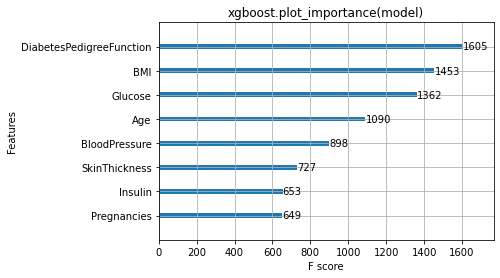

In [267]:
import matplotlib.pylab as pl
xgboost.plot_importance(model)
pl.title("xgboost.plot_importance(model)")
pl.show()

In [268]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_data.iloc[0,:])

In [269]:
shap.force_plot(explainer.expected_value, shap_values[:1000,:], X_data.iloc[:1000,:])


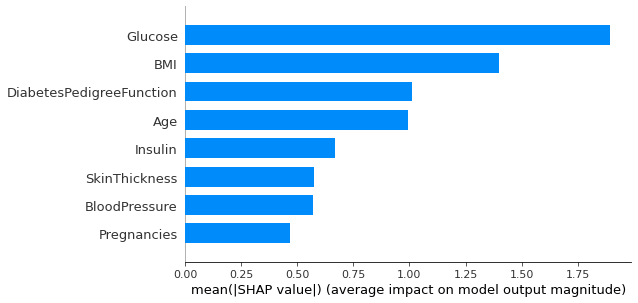

In [270]:
shap.summary_plot(shap_values, X_data, plot_type="bar")


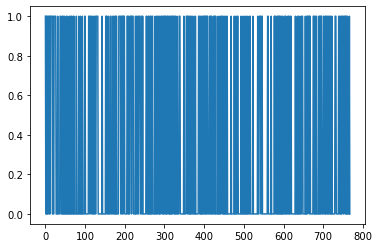

In [271]:
pl.plot(y.index, y.values)

In [272]:
shap_values.shape

(768, 8)

In [273]:
data.shape

(768, 9)

In [274]:
X_data.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.566438,0.207439,0.094326,0.476790,0.168179,0.204015
std,0.198210,0.160666,0.158654,0.161134,0.136222,0.117499,0.141473,0.196004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.497487,0.508197,0.000000,0.000000,0.406855,0.070773,0.050000
50%,0.176471,0.587940,0.590164,0.232323,0.036052,0.476900,0.125747,0.133333
75%,0.352941,0.704774,0.655738,0.323232,0.150414,0.545455,0.234095,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


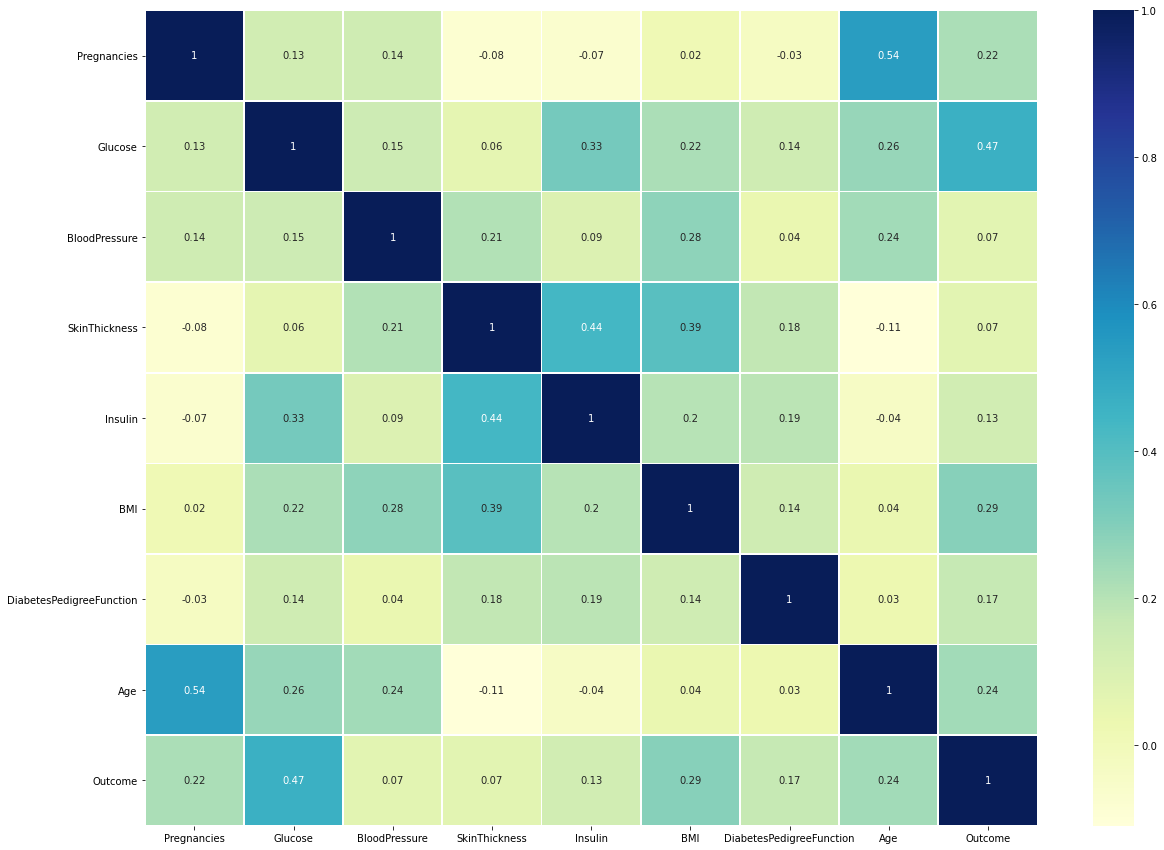

In [275]:

import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(data=data.corr().round(2), annot=True, linewidths=0.7, cmap='YlGnBu')
plt.show()

In [276]:
#load Dataset
data_AIA = pd.read_csv('diabetes_AIA.csv')
data_AIA.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_TAI,Glucose_TAI,BloodPressure_TAI,SkinThickness_TAI,Insulin_TAI,BMI_TAI,DiabetesPedigreeFunction_TAI,Age_TAI
0,6,148,72,35,0,33.6,0.627,50,1,1,1,0,0,0,1,0,1
1,1,85,66,29,0,26.6,0.351,31,0,1,1,0,0,0,1,0,1
2,8,183,64,0,0,23.3,0.672,32,1,1,1,0,0,0,1,0,1
3,1,89,66,23,94,28.1,0.167,21,0,1,1,0,0,0,1,0,1
4,0,137,40,35,168,43.1,2.288,33,1,1,1,0,0,0,1,0,1


In [277]:
data_AIA.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_TAI',
       'Glucose_TAI', 'BloodPressure_TAI', 'SkinThickness_TAI', 'Insulin_TAI',
       'BMI_TAI', 'DiabetesPedigreeFunction_TAI', 'Age_TAI'],
      dtype='object')

In [278]:
cols = ['Pregnancies_TAI',
       'Glucose_TAI', 'BloodPressure_TAI', 'SkinThickness_TAI', 'Insulin_TAI',
       'BMI_TAI', 'DiabetesPedigreeFunction_TAI', 'Age_TAI']
data_AIA[cols].head()

,Pregnancies_TAI,Glucose_TAI,BloodPressure_TAI,SkinThickness_TAI,Insulin_TAI,BMI_TAI,DiabetesPedigreeFunction_TAI,Age_TAI
0,1,1,0,0,0,1,0,1
1,1,1,0,0,0,1,0,1
2,1,1,0,0,0,1,0,1
3,1,1,0,0,0,1,0,1
4,1,1,0,0,0,1,0,1


In [279]:
dataAIA_arr = data_AIA[cols].to_numpy()

In [280]:
type(dataAIA_arr)

numpy.ndarray

In [281]:
norm = np.zeros((768,8))
for i in range(len(shap_values)):
    summ = 0
    for j in range(8):
        summ = summ + abs(shap_values[i][j])
    norm[i]= shap_values[i] / summ

In [282]:
myArr = np.zeros((768,1))
for i in range(len(dataAIA_arr)):
    summ = 0
    for j in range(8):
        summ = dataAIA_arr[i][j] * abs(norm[i][j])
    myArr[i]= (summ*100)
    

In [283]:
myArr

array([[2.96327382e+01],
       [1.54899478e+01],
       [1.34753928e+01],
       [1.76882401e+01],
       [2.13811457e+01],
       [4.29672562e+00],
       [2.56299954e+00],
       [5.55422492e+00],
       [2.43079409e+01],
       [1.76120430e+01],
       [7.61356950e-01],
       [2.71046162e+00],
       [2.27631018e+01],
       [1.53985843e+01],
       [1.59803420e+01],
       [2.24775225e+01],
       [2.45329529e+01],
       [2.88933128e+01],
       [8.73321667e+00],
       [3.32342178e+01],
       [1.20929167e+01],
       [2.06484139e+01],
       [5.51595837e+00],
       [2.17183247e+01],
       [2.98533708e+01],
       [9.57573357e-02],
       [3.79397392e+01],
       [1.58672571e+01],
       [4.93484326e+00],
       [6.29274398e+00],
       [1.46384701e+01],
       [5.13755381e+00],
       [8.60793069e+00],
       [3.20657641e+00],
       [2.06465140e+01],
       [1.37230113e+01],
       [2.73448508e+00],
       [1.23007074e+01],
       [4.43808027e+00],
       [2.60203242e+01],


In [284]:
data_AIA["TAI Goal"] = myArr

In [285]:
data_AIA

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_TAI,Glucose_TAI,BloodPressure_TAI,SkinThickness_TAI,Insulin_TAI,BMI_TAI,DiabetesPedigreeFunction_TAI,Age_TAI,TAI Goal
0,6,148,72,35,0,33.6,0.627,50,1,1,1,0,0,0,1,0,1,29.632738
1,1,85,66,29,0,26.6,0.351,31,0,1,1,0,0,0,1,0,1,15.489948
2,8,183,64,0,0,23.3,0.672,32,1,1,1,0,0,0,1,0,1,13.475393
3,1,89,66,23,94,28.1,0.167,21,0,1,1,0,0,0,1,0,1,17.688240
4,0,137,40,35,168,43.1,2.288,33,1,1,1,0,0,0,1,0,1,21.381146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,1,1,0,0,0,1,0,1,11.594030
764,2,122,70,27,0,36.8,0.340,27,0,1,1,0,0,0,1,0,1,18.408030
765,5,121,72,23,112,26.2,0.245,30,0,1,1,0,0,0,1,0,1,12.456901
766,1,126,60,0,0,30.1,0.349,47,1,1,1,0,0,0,1,0,1,18.043885


In [286]:
X_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [287]:
mu, sigma = 0.3, 0.1 
noise = np.random.normal(mu, sigma, X_data.shape) 
signal = X_data + noise
signal.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.682895,0.973825,0.711159,0.656226,0.509000,0.964950,0.521684,0.813907
1,0.543223,0.613836,0.994914,0.601121,0.341496,0.819096,0.418741,0.505813
2,0.730657,1.154104,0.753663,0.099279,0.294161,0.583094,0.504646,0.478454
3,0.744732,0.728657,0.801451,0.616319,0.509248,0.763286,0.385302,0.295256
4,0.322809,0.898157,0.501258,0.667322,0.597110,0.930069,1.202823,0.568570


In [288]:
# # 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
# #        'BMI', 'DiabetesPedigreeFunction', 'Age'
# kdep = scipy.stats.gaussian_kde(X_data['Pregnancies'])
# kdepn = scipy.stats.gaussian_kde(signal['Pregnancies'])

# kdeg = scipy.stats.gaussian_kde(X_data['Glucose'])
# kdegn = scipy.stats.gaussian_kde(signal['Glucose'])

# kdeb = scipy.stats.gaussian_kde(X_data['BloodPressure'])
# kdebn = scipy.stats.gaussian_kde(signal['BloodPressure'])

# kdes = scipy.stats.gaussian_kde(X_data['SkinThickness'])
# kdesn = scipy.stats.gaussian_kde(signal['SkinThickness'])

# kdei = scipy.stats.gaussian_kde(X_data['Insulin'])
# kdein = scipy.stats.gaussian_kde(signal['Insulin'])

# kdeB = scipy.stats.gaussian_kde(X_data['BMI'])
# kdeBn = scipy.stats.gaussian_kde(signal['BMI'])

# kded = scipy.stats.gaussian_kde(X_data['DiabetesPedigreeFunction'])
# kdedn = scipy.stats.gaussian_kde(signal['DiabetesPedigreeFunction'])

# kdea = scipy.stats.gaussian_kde(X_data['Age'])
# kdean = scipy.stats.gaussian_kde(signal['Age'])

# grid = np.linspace(0,1, 500)
# fig, axes = plt.subplots(nrows=2, ncols=4, figsize = (25,12))

# # Pass the data you wish to plot.
# #axes[0][0].hist(X_data['Pregnancies'],bins=20)
# # axes[0][0].plot.xlabel('Pregnancies')
# # axes[0][0].plot.ylabel('Frequency')
# # axes[0][0].plot.title('Histogram of trips mean sampling rate')

# axes[0][0].plot(grid, kdep(grid), label="Pregnancies")
# axes[0][0].plot(grid, kdepn(grid), label="Pregnancies + noise")
# axes[0][0].plot(grid, kdep(grid)-kdepn(grid), label="difference")
# axes[0][0].set_title('Distribution of Pregnancies', fontsize = 14)
# axes[0][0].set_xlabel("Pregnancies", fontsize = 14)
# axes[0][0].set_ylabel("Frequency", fontsize = 14)
# axes[0][0].legend(fontsize = 12, loc = 1)

# axes[0][1].plot(grid, kdeg(grid), label="Glucose")
# axes[0][1].plot(grid, kdegn(grid), label="Glucose + noise")
# axes[0][1].plot(grid, kdeg(grid)-kdegn(grid), label="difference")
# axes[0][1].set_title('Distribution of Glucose', fontsize = 14)
# axes[0][1].set_xlabel("Glucose", fontsize = 14)
# axes[0][1].set_ylabel("Frequency", fontsize = 14)
# axes[0][1].legend(fontsize = 12, loc = 1)

# axes[0][2].plot(grid, kdeb(grid), label="BloodPressure")
# axes[0][2].plot(grid, kdebn(grid), label="BloodPressure + noise")
# axes[0][2].plot(grid, kdeb(grid)-kdebn(grid), label="difference")
# axes[0][2].set_title('Distribution of BloodPressure', fontsize = 14)
# axes[0][2].set_xlabel("BloodPressure", fontsize = 14)
# axes[0][2].set_ylabel("Frequency", fontsize = 14)
# axes[0][2].legend(fontsize = 12, loc = 1)

# axes[0][3].plot(grid, kdes(grid), label="SkinThickness")
# axes[0][3].plot(grid, kdesn(grid), label="SkinThickness + noise")
# axes[0][3].plot(grid, kdes(grid)-kdesn(grid), label="difference")
# axes[0][3].set_title('Distribution of SkinThickness', fontsize = 14)
# axes[0][3].set_xlabel("SkinThickness", fontsize = 14)
# axes[0][3].set_ylabel("Frequency", fontsize = 14)
# axes[0][3].legend(fontsize = 12, loc = 1)

# axes[1][0].plot(grid, kdei(grid), label="Insulin")
# axes[1][0].plot(grid, kdein(grid), label="Insulin + noise")
# axes[1][0].plot(grid, kdei(grid)-kdein(grid), label="difference")
# axes[1][0].set_title('Distribution of Insulin', fontsize = 14)
# axes[1][0].set_xlabel("Insulin", fontsize = 14)
# axes[1][0].set_ylabel("Frequency", fontsize = 14)
# axes[1][0].legend(fontsize = 12, loc = 1)

# axes[1][1].plot(grid, kdeB(grid), label="BMI")
# axes[1][1].plot(grid, kdeBn(grid), label="BMI + noise")
# axes[1][1].plot(grid, kdeB(grid)-kdeBn(grid), label="difference")
# axes[1][1].set_title('Distribution of BMI', fontsize = 14)
# axes[1][1].set_xlabel("BMI", fontsize = 14)
# axes[1][1].set_ylabel("Frequency", fontsize = 14)
# axes[1][1].legend(fontsize = 12, loc = 1)

# axes[1][2].plot(grid, kded(grid), label="DiabetesPedigreeFunction")
# axes[1][2].plot(grid, kdedn(grid), label="DiabetesPedigreeFunction + noise")
# axes[1][2].plot(grid, kded(grid)-kdedn(grid), label="difference")
# axes[1][2].set_title('Distribution of DiabetesPedigreeFunction', fontsize = 14)
# axes[1][2].set_xlabel("DiabetesPedigreeFunction", fontsize = 14)
# axes[1][2].set_ylabel("Frequency", fontsize = 14)
# axes[1][2].legend(fontsize = 12, loc = 1)

# axes[1][3].plot(grid, kdea(grid), label="Age")
# axes[1][3].plot(grid, kdean(grid), label="Age + noise")
# axes[1][3].plot(grid, kdea(grid)-kdean(grid), label="difference")
# axes[1][3].set_title('Distribution of Age', fontsize = 14)
# axes[1][3].set_xlabel("Age", fontsize = 14)
# axes[1][3].set_ylabel("Frequency", fontsize = 14)
# axes[1][3].legend(fontsize = 12, loc = 1)

# plt.savefig('Distributions.png', dpi=300) 
# plt.show()



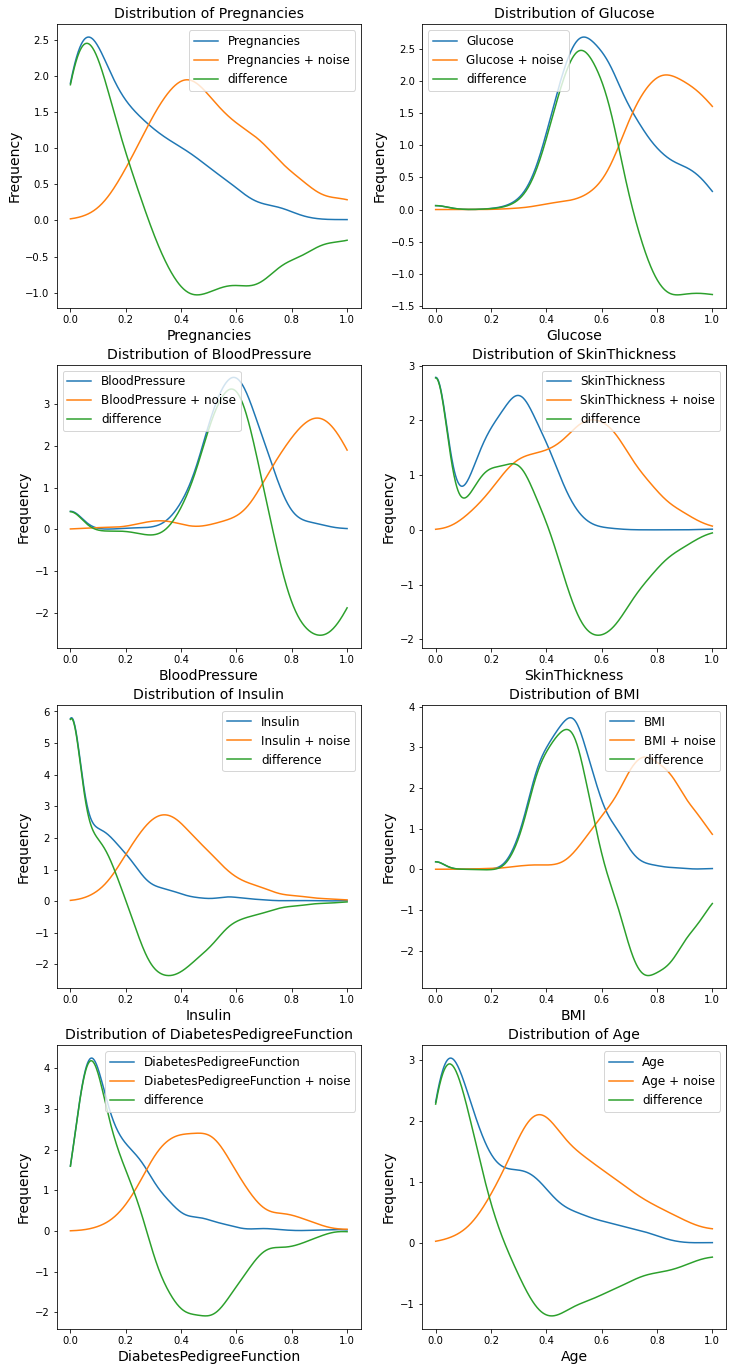

In [289]:
# 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
#        'BMI', 'DiabetesPedigreeFunction', 'Age'
kdep = scipy.stats.gaussian_kde(X_data['Pregnancies'])
kdepn = scipy.stats.gaussian_kde(signal['Pregnancies'])

kdeg = scipy.stats.gaussian_kde(X_data['Glucose'])
kdegn = scipy.stats.gaussian_kde(signal['Glucose'])

kdeb = scipy.stats.gaussian_kde(X_data['BloodPressure'])
kdebn = scipy.stats.gaussian_kde(signal['BloodPressure'])

kdes = scipy.stats.gaussian_kde(X_data['SkinThickness'])
kdesn = scipy.stats.gaussian_kde(signal['SkinThickness'])

kdei = scipy.stats.gaussian_kde(X_data['Insulin'])
kdein = scipy.stats.gaussian_kde(signal['Insulin'])

kdeB = scipy.stats.gaussian_kde(X_data['BMI'])
kdeBn = scipy.stats.gaussian_kde(signal['BMI'])

kded = scipy.stats.gaussian_kde(X_data['DiabetesPedigreeFunction'])
kdedn = scipy.stats.gaussian_kde(signal['DiabetesPedigreeFunction'])

kdea = scipy.stats.gaussian_kde(X_data['Age'])
kdean = scipy.stats.gaussian_kde(signal['Age'])

grid = np.linspace(0,1, 500)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize = (12,24))

# Pass the data you wish to plot.
#axes[0][0].hist(X_data['Pregnancies'],bins=20)
# axes[0][0].plot.xlabel('Pregnancies')
# axes[0][0].plot.ylabel('Frequency')
# axes[0][0].plot.title('Histogram of trips mean sampling rate')

axes[0][0].plot(grid, kdep(grid), label="Pregnancies")
axes[0][0].plot(grid, kdepn(grid), label="Pregnancies + noise")
axes[0][0].plot(grid, kdep(grid)-kdepn(grid), label="difference")
axes[0][0].set_title('Distribution of Pregnancies', fontsize = 14)
axes[0][0].set_xlabel("Pregnancies", fontsize = 14)
axes[0][0].set_ylabel("Frequency", fontsize = 14)
axes[0][0].legend(fontsize = 12, loc = 1)

axes[0][1].plot(grid, kdeg(grid), label="Glucose")
axes[0][1].plot(grid, kdegn(grid), label="Glucose + noise")
axes[0][1].plot(grid, kdeg(grid)-kdegn(grid), label="difference")
axes[0][1].set_title('Distribution of Glucose', fontsize = 14)
axes[0][1].set_xlabel("Glucose", fontsize = 14)
axes[0][1].set_ylabel("Frequency", fontsize = 14)
axes[0][1].legend(fontsize = 12, loc = 2)

axes[1][0].plot(grid, kdeb(grid), label="BloodPressure")
axes[1][0].plot(grid, kdebn(grid), label="BloodPressure + noise")
axes[1][0].plot(grid, kdeb(grid)-kdebn(grid), label="difference")
axes[1][0].set_title('Distribution of BloodPressure', fontsize = 14)
axes[1][0].set_xlabel("BloodPressure", fontsize = 14)
axes[1][0].set_ylabel("Frequency", fontsize = 14)
axes[1][0].legend(fontsize = 12, loc = 2)

axes[1][1].plot(grid, kdes(grid), label="SkinThickness")
axes[1][1].plot(grid, kdesn(grid), label="SkinThickness + noise")
axes[1][1].plot(grid, kdes(grid)-kdesn(grid), label="difference")
axes[1][1].set_title('Distribution of SkinThickness', fontsize = 14)
axes[1][1].set_xlabel("SkinThickness", fontsize = 14)
axes[1][1].set_ylabel("Frequency", fontsize = 14)
axes[1][1].legend(fontsize = 12, loc = 1)

axes[2][0].plot(grid, kdei(grid), label="Insulin")
axes[2][0].plot(grid, kdein(grid), label="Insulin + noise")
axes[2][0].plot(grid, kdei(grid)-kdein(grid), label="difference")
axes[2][0].set_title('Distribution of Insulin', fontsize = 14)
axes[2][0].set_xlabel("Insulin", fontsize = 14)
axes[2][0].set_ylabel("Frequency", fontsize = 14)
axes[2][0].legend(fontsize = 12, loc = 1)

axes[2][1].plot(grid, kdeB(grid), label="BMI")
axes[2][1].plot(grid, kdeBn(grid), label="BMI + noise")
axes[2][1].plot(grid, kdeB(grid)-kdeBn(grid), label="difference")
axes[2][1].set_title('Distribution of BMI', fontsize = 14)
axes[2][1].set_xlabel("BMI", fontsize = 14)
axes[2][1].set_ylabel("Frequency", fontsize = 14)
axes[2][1].legend(fontsize = 12, loc = 1)

axes[3][0].plot(grid, kded(grid), label="DiabetesPedigreeFunction")
axes[3][0].plot(grid, kdedn(grid), label="DiabetesPedigreeFunction + noise")
axes[3][0].plot(grid, kded(grid)-kdedn(grid), label="difference")
axes[3][0].set_title('Distribution of DiabetesPedigreeFunction', fontsize = 14)
axes[3][0].set_xlabel("DiabetesPedigreeFunction", fontsize = 14)
axes[3][0].set_ylabel("Frequency", fontsize = 14)
axes[3][0].legend(fontsize = 12, loc = 1)

axes[3][1].plot(grid, kdea(grid), label="Age")
axes[3][1].plot(grid, kdean(grid), label="Age + noise")
axes[3][1].plot(grid, kdea(grid)-kdean(grid), label="difference")
axes[3][1].set_title('Distribution of Age', fontsize = 14)
axes[3][1].set_xlabel("Age", fontsize = 14)
axes[3][1].set_ylabel("Frequency", fontsize = 14)
axes[3][1].legend(fontsize = 12, loc = 1)

plt.savefig('Distributions.png', dpi=300) 
plt.show()



In [290]:
#Split the dataset into train and Test
seed = 7
test_size = 0.25
Xs_trian, Xs_test, ys_train, ys_test = train_test_split(signal, y, test_size=test_size, random_state=seed)

In [291]:
model2 = xgboost.XGBClassifier(learning_rate =0.1,
                              n_estimators=1000,
                              max_depth=5,
                              min_child_weight=1,
                              gamma=0,
                              subsample=0.8,
                              colsample_bytree=0.8,
                              objective= 'binary:logistic',
                              nthread=4,
                              scale_pos_weight=1,
                              seed=27).fit(Xs_trian, ys_train)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[10:57:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [292]:
y_pred = model2.predict(Xs_test)

In [293]:
shap.initjs()

In [294]:
#Local Interpretation using SHAP (for prediction at id number 4776)
explainer = shap.TreeExplainer(model2)
shap_values = explainer.shap_values(signal)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


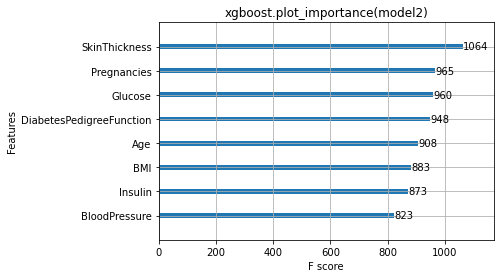

In [295]:
xgboost.plot_importance(model2)
plt.title("xgboost.plot_importance(model2)")
plt.show()

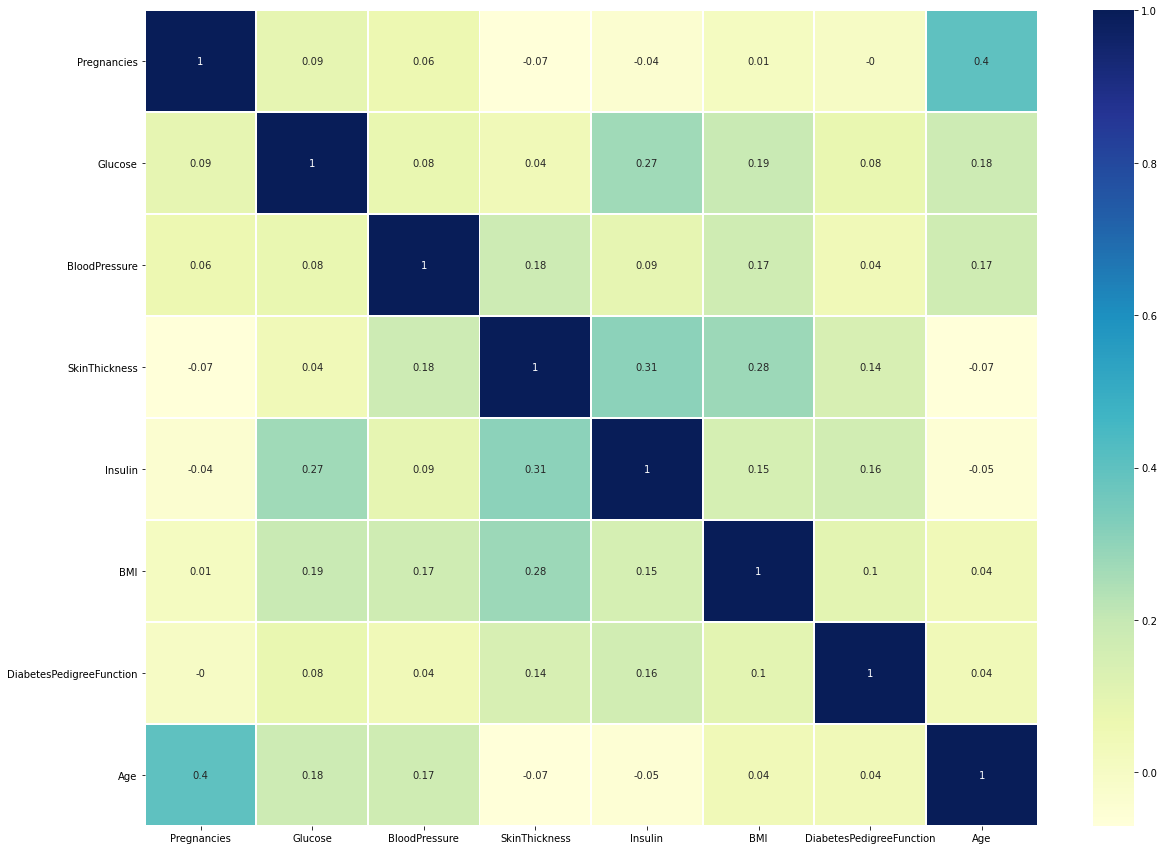

In [296]:

import seaborn as sns
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(data=signal.corr().round(2), annot=True, linewidths=0.7, cmap='YlGnBu')
plt.show()

In [297]:
norm = np.zeros((768,8))
for i in range(len(shap_values)):
    summ = 0
    for j in range(8):
        summ = summ + abs(shap_values[i][j])
    norm[i]= shap_values[i] / summ

In [298]:
myArr = np.zeros((768,1))
for i in range(len(dataAIA_arr)):
    summ = 0
    for j in range(8):
        summ = dataAIA_arr[i][j] * abs(norm[i][j])
    myArr[i]= (summ*100)

In [299]:
data_AIA["TAI Goal (Biased)"] = myArr


In [300]:
data_AIA
#data_AIA.to_csv('Score.csv')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_TAI,Glucose_TAI,BloodPressure_TAI,SkinThickness_TAI,Insulin_TAI,BMI_TAI,DiabetesPedigreeFunction_TAI,Age_TAI,TAI Goal,TAI Goal (Biased)
0,6,148,72,35,0,33.6,0.627,50,1,1,1,0,0,0,1,0,1,29.632738,6.693703
1,1,85,66,29,0,26.6,0.351,31,0,1,1,0,0,0,1,0,1,15.489948,14.266664
2,8,183,64,0,0,23.3,0.672,32,1,1,1,0,0,0,1,0,1,13.475393,18.592539
3,1,89,66,23,94,28.1,0.167,21,0,1,1,0,0,0,1,0,1,17.688240,18.471046
4,0,137,40,35,168,43.1,2.288,33,1,1,1,0,0,0,1,0,1,21.381146,6.095581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,1,1,0,0,0,1,0,1,11.594030,33.198977
764,2,122,70,27,0,36.8,0.340,27,0,1,1,0,0,0,1,0,1,18.408030,9.634966
765,5,121,72,23,112,26.2,0.245,30,0,1,1,0,0,0,1,0,1,12.456901,10.906697
766,1,126,60,0,0,30.1,0.349,47,1,1,1,0,0,0,1,0,1,18.043885,17.807931


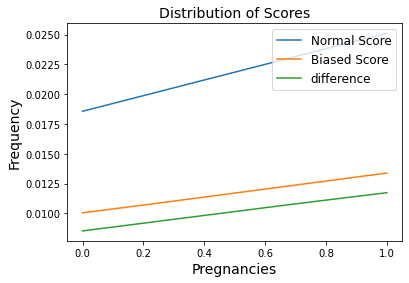

In [301]:
kdeScore = scipy.stats.gaussian_kde(data_AIA['TAI Goal'])
kdeScoren = scipy.stats.gaussian_kde(data_AIA['TAI Goal (Biased)'])

grid = np.linspace(0,1, 500)
#fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (12,24))

# Pass the data you wish to plot.
#axes[0][0].hist(X_data['Pregnancies'],bins=20)
# axes[0][0].plot.xlabel('Pregnancies')
# axes[0][0].plot.ylabel('Frequency')
# axes[0][0].plot.title('Histogram of trips mean sampling rate')

plt.plot(grid, kdeScore(grid), label="Normal Score")
plt.plot(grid, kdeScoren(grid), label="Biased Score")
plt.plot(grid, kdeScore(grid)-kdeScoren(grid), label="difference")
plt.title('Distribution of Scores', fontsize = 14)
plt.xlabel("Pregnancies", fontsize = 14)
plt.ylabel("Frequency", fontsize = 14)
plt.legend(fontsize = 12, loc = 1)

plt.show()

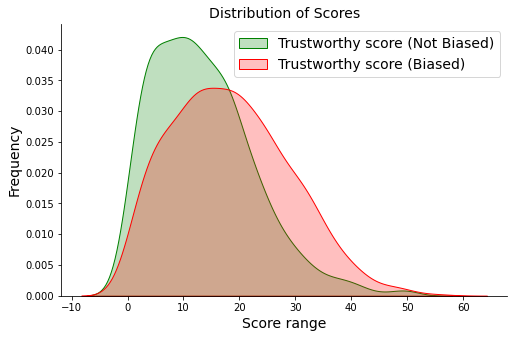

In [302]:
#histogram of VIX Open
plt.figure(figsize=(8,5))
sns.kdeplot(data_AIA['TAI Goal'], shade=1, color='green',legend=True)
sns.kdeplot(data_AIA['TAI Goal (Biased)'], shade=1, color='red',legend=True)

plt.xlabel('Score range', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.title("Distribution of Scores", fontsize = 14)
sns.despine()
plt.legend(labels=['Trustworthy score (Not Biased)','Trustworthy score (Biased)'],fontsize = 14)
#plt.savefig('Histogram of indices.png')
plt.savefig('Histogram of indices.png', dpi=300) 